# Arun Kumar Nayak(kvarunkumarnayak@gmail.com)

# The Sparks Foundation

# Prediction using Supervised ML

### It's a simple Linear Regression Task of 2 variables. We have to predict the Percentage Score from number of Study Hours.


## Getting and analysing the dataset

In [3]:
import numpy as np
import requests
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
file=requests.get(url)
#print(file.content)
with open("score.csv",'wb') as f:
    f.write(file.content)
import csv
with open('score.csv') as f:
    reader=csv.DictReader(f)
    score=[dict(row) for row in reader] 
X=[]
Y=[]
for item in score:
    X.append(np.array([float(item['Hours'])]))
    Y.append(float(item['Scores']))
X,Y=np.array(X),np.array(Y)
print(X,Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]] [21. 47. 27. 75. 30. 20. 88. 60. 81. 25. 85. 62. 41. 42. 17. 95. 30. 24.
 67. 69. 30. 54. 35. 76. 86.]


## Visualization of data points

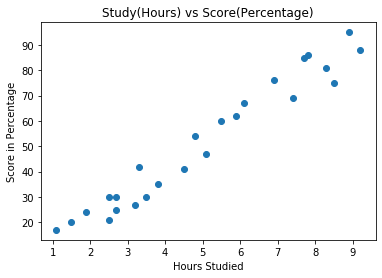

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.title('Study(Hours) vs Score(Percentage)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in Percentage')  
plt.show()

#### We can see that Percentage Score is positively linearly dependent on No. of Hours Studied. So we can fit a line across data points.

## Applying Linear Regression and checking cross-validation error

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

algo = LinearRegression(fit_intercept=False)
print(sum(cross_val_score(algo, X, Y, cv=5))/5)

0.9231329808418132


In [7]:
algo2 = LinearRegression()
print(sum(cross_val_score(algo2, X, Y, cv=5))/5)

0.9180771341891051


#### algo has more cross-validation score so we will use algo for futher predictions.

## Splitting of train and test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

#Printing test set.
print(X_test,Y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [20. 27. 69. 30. 62.]


## Training of algorithm on Train set

In [9]:
algo=algo.fit(X_train,Y_train)
print("Algorithm Trained on Train Set")

Algorithm Trained on Train Set


## Visualizing the working of the algorithm

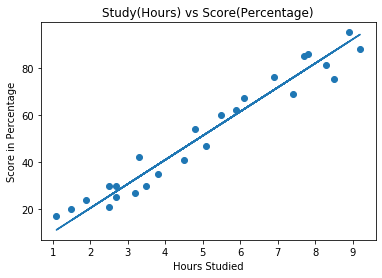

In [10]:
Line = algo.coef_*X+algo.intercept_
# Regression Line

plt.scatter(X, Y)
plt.plot(X,Line)
plt.title('Study(Hours) vs Score(Percentage)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score in Percentage')
plt.show()
# Test Data

## Prediction on Test Set

In [11]:
Pred_Y=algo.predict(X_test)

print(Pred_Y)

[15.33758473 32.72018076 75.665418   25.56264122 60.32783327]


## Evaluation

In [12]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test, Pred_Y))

4.631507908193602


## Prediction on given value

In [13]:
# Predicted Score if the student studies for 9.25hrs/day

Hours=[[9.25]]
print("For 9.25hrs/day the score will be",algo.predict(Hours)[0],"%.")

For 9.25hrs/day the score will be 94.58177250564869 %.


#### If the student studies for 9.25 hrs/day, he/she will score 94.58%. 